# Import Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


import pickle

from sklearn import __version__ as sklearn_version
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime
from sklearn.metrics import accuracy_score


# Show plots inline
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Data Collection and Acquisition

In [3]:
# Code task 1 - Gather data
# Load CSV from a local file

df = pd.read_csv('df_features.csv')
df.head(10)

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M
5,98,6,Dress,Adidas,Men's Fashion,47,1.379566,Yellow,L
6,16,7,Jeans,Gucci,Men's Fashion,37,1.356750,White,XL
7,63,8,Sweater,Zara,Kids' Fashion,64,4.360303,Blue,XL
8,96,9,Sweater,H&M,Men's Fashion,53,4.466182,Green,XL
9,36,10,T-shirt,Zara,Kids' Fashion,55,4.093234,White,XL


In [4]:
# Show the segmented DataFrame
print(df.head())

   User ID  Product ID Product Name   Brand         Category  Price    Rating  \
0       19           1        Dress  Adidas    Men's Fashion     40  1.043159   
1       97           2        Shoes     H&M  Women's Fashion     82  4.026416   
2       25           3        Dress  Adidas  Women's Fashion     44  3.337938   
3       57           4        Shoes    Zara    Men's Fashion     23  1.049523   
4       79           5      T-shirt  Adidas    Men's Fashion     79  4.302773   

    Color Size  
0   Black   XL  
1   Black    L  
2  Yellow   XL  
3   White    S  
4   Black    M  


In [5]:
# Code task 4
# Check the format of all columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User ID       1000 non-null   int64  
 1   Product ID    1000 non-null   int64  
 2   Product Name  1000 non-null   object 
 3   Brand         1000 non-null   object 
 4   Category      1000 non-null   object 
 5   Price         1000 non-null   int64  
 6   Rating        1000 non-null   float64
 7   Color         1000 non-null   object 
 8   Size          1000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


# Feature Encoding

# Handling Non-Numeric Features (Categorical variables)

Encoding all non-numeric features such as "Product Name", "Brand", "Category", "Color", "Size" and User ID into numeric values

In [6]:
# Code task 17
#Create dummy or indicator features for categorical variable "Product Name", "Brand", "Category", "Color", "Size"

#from sklearn.preprocessing import OneHotEncoder

#categorical data
#categorical_cols = ["Product Name", "Brand", "Category", "Color", "Size", "User ID"]


#import pandas as pd
#df_new = pd.get_dummies(df, columns = categorical_cols, dtype=int)
#df_new

In [7]:
import category_encoders as ce
import pandas as pd


# Create an encoder instance (e.g., Ordinal Encoder)
encoder = ce.OrdinalEncoder(cols=["Product Name", "Brand", "Category", "Color", "Size", "User ID"])

# Fit the encoder on the data and transform the same data
encoded_data = encoder.fit_transform(df)

# Ensure the data types are numeric
encoded_data = encoded_data.apply(pd.to_numeric, errors='ignore')

print(encoded_data)

     User ID  Product ID  Product Name  Brand  Category  Price    Rating  \
0          1           1             1      1         1     40  1.043159   
1          2           2             2      2         2     82  4.026416   
2          3           3             1      1         2     44  3.337938   
3          4           4             2      3         1     23  1.049523   
4          5           5             3      1         1     79  4.302773   
..       ...         ...           ...    ...       ...    ...       ...   
995       26         996             2      3         2     55  1.620081   
996       50         997             5      5         3     13  1.544464   
997       13         998             5      3         1     47  3.961913   
998       85         999             3      3         2     68  3.089722   
999       32        1000             2      1         2     79  3.093553   

     Color  Size  
0        1     1  
1        1     2  
2        2     1  
3        3 

In [8]:
df_new = pd.DataFrame(encoded_data)
df_new

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,1,1,1,1,1,40,1.043159,1,1
1,2,2,2,2,2,82,4.026416,1,2
2,3,3,1,1,2,44,3.337938,2,1
3,4,4,2,3,1,23,1.049523,3,3
4,5,5,3,1,1,79,4.302773,1,4
...,...,...,...,...,...,...,...,...,...
995,26,996,2,3,2,55,1.620081,1,4
996,50,997,5,5,3,13,1.544464,5,2
997,13,998,5,3,1,47,3.961913,3,2
998,85,999,3,3,2,68,3.089722,4,3


Here, we have created a feature matrix where:

Product ID and Price are identifiers.
Rating is the target variable.
Rest all are the features including User ID as this feature is iterative and repeats several times in the dataset.Choosing User ID as a categorical variable will allow us to capture a group-specific patterns such as preferences, activity levels.

In [9]:
# Code task 18
# Check the shape of the new dataframe (including newly encoded columns) in the DataFrame

print(df_new.shape)

(1000, 9)


In [10]:
# Code task 19
# Check the format of all columns (including newly encoded columns) in the DataFrame

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User ID       1000 non-null   int64  
 1   Product ID    1000 non-null   int64  
 2   Product Name  1000 non-null   int64  
 3   Brand         1000 non-null   int64  
 4   Category      1000 non-null   int64  
 5   Price         1000 non-null   int64  
 6   Rating        1000 non-null   float64
 7   Color         1000 non-null   int64  
 8   Size          1000 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 70.4 KB


All columns are now numeric.

In [11]:
# Code task 20
# Check the description of all the numerical columns (including newly encoded columns) in the DataFrame

df_new.describe()

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,48.378000,500.500000,2.997000,3.029000,2.029000,55.785000,2.993135,3.451000,2.487000
std,27.959736,288.819436,1.356035,1.426251,0.820263,26.291748,1.153185,1.654187,1.118518
min,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,1.000967,1.000000,1.000000
25%,24.000000,250.750000,2.000000,2.000000,1.000000,33.000000,1.992786,2.000000,1.000000
50%,47.000000,500.500000,3.000000,3.000000,2.000000,57.000000,2.984003,3.000000,2.000000
75%,73.000000,750.250000,4.000000,4.000000,3.000000,78.250000,3.985084,5.000000,3.000000
max,100.000000,1000.000000,5.000000,5.000000,3.000000,100.000000,4.987964,6.000000,4.000000


# Train/Test Split

Partition sizes with a 70/30 train/test split

In [12]:
len(df_new) * .7, len(df_new) * .3

(700.0, 300.0)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df_new.drop(columns='Rating'), 
                                                    df_new.Rating, test_size=0.3, 
                                                    random_state=47)

In [14]:
X_train.shape, X_test.shape

((700, 8), (300, 8))

In [15]:
y_train.shape, y_test.shape

((700,), (300,))

In [16]:
#Check the `dtypes` attribute of `X_train` to verify all features are numeric
X_train.dtypes

User ID         int64
Product ID      int64
Product Name    int64
Brand           int64
Category        int64
Price           int64
Color           int64
Size            int64
dtype: object

In [17]:
#Repeat this check for the test split in `X_test`
X_test.dtypes

User ID         int64
Product ID      int64
Product Name    int64
Brand           int64
Category        int64
Price           int64
Color           int64
Size            int64
dtype: object

We have only numeric features in our X now!

In [18]:
import pandas as pd
correlation_matrix = X_train.corr()
correlation_matrix

,User ID,Product ID,Product Name,Brand,Category,Price,Color,Size
User ID,1.000000,0.132113,0.041646,-0.040874,-0.042473,-0.019418,0.054856,0.002755
Product ID,0.132113,1.000000,0.007082,0.043506,0.007312,0.031849,0.007330,0.024196
Product Name,0.041646,0.007082,1.000000,0.034083,-0.019345,0.003833,0.007989,-0.013790
Brand,-0.040874,0.043506,0.034083,1.000000,-0.012902,0.042266,0.020829,-0.031905
Category,-0.042473,0.007312,-0.019345,-0.012902,1.000000,0.046599,-0.025886,-0.013358
Price,-0.019418,0.031849,0.003833,0.042266,0.046599,1.000000,-0.012802,0.025793
Color,0.054856,0.007330,0.007989,0.020829,-0.025886,-0.012802,1.000000,-0.001858
Size,0.002755,0.024196,-0.013790,-0.031905,-0.013358,0.025793,-0.001858,1.000000


# Method 1 - Random Forest Model

# Define the pipeline

In [19]:
#Define a pipeline comprising the steps:
#SimpleImputer() with a strategy of 'median'
#StandardScaler(),
#and then RandomForestRegressor() with a random state of 47
RF_pipe = make_pipeline(
    RandomForestRegressor(n_estimators=100, max_depth=10, random_state=47, min_samples_split=10)
)

In [20]:
X_train.head()

,User ID,Product ID,Product Name,Brand,Category,Price,Color,Size
128,69,129,3,3,2,85,2,4
492,4,493,2,2,3,88,3,1
303,68,304,1,1,2,85,5,4
120,67,121,3,4,1,96,6,4
455,35,456,2,4,1,14,4,4


# Fit and assess performance using cross-validation

In [21]:
#Call `cross_validate` to estimate the pipeline's performance.
#Pass it the random forest pipe object, `X_train` and `y_train`,
#and get it to use 5-fold cross-validation
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5, scoring='r2')


In [22]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([-0.08374495, -0.07379969, -0.06188638, -0.10581285, -0.10322121])

In [23]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(-0.08569301521219894, 0.016876301006255694)

# Hyperparameter search using GridSearchCV

In [24]:
n_est = [100, 200, 300]
max_depth=[5, 10, 20]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
grid_params = {
    'randomforestregressor__n_estimators': n_est, 
    'randomforestregressor__max_depth': max_depth,
    'randomforestregressor__min_samples_split': min_samples_split,
    'randomforestregressor__min_samples_leaf': min_samples_leaf
}
grid_params

{'randomforestregressor__n_estimators': [100, 200, 300],
 'randomforestregressor__max_depth': [5, 10, 20],
 'randomforestregressor__min_samples_split': [2, 5, 10],
 'randomforestregressor__min_samples_leaf': [1, 2, 4]}

In [25]:
#Call `GridSearchCV` with the random forest pipeline, passing in the above `grid_params`
#dict for parameters to evaluate, 5-fold cross-validation, and all available CPU cores (if desired)
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [26]:
#Now call the `GridSearchCV`'s `fit()` method with `X_train` and `y_train` as arguments
#to actually start the grid search. This may take a minute or two.
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('randomforestregressor',
                                        RandomForestRegressor(max_depth=10,
                                                              min_samples_split=10,
                                                              random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [5, 10, 20],
                         'randomforestregressor__min_samples_leaf': [1, 2, 4],
                         'randomforestregressor__min_samples_split': [2, 5, 10],
                         'randomforestregressor__n_estimators': [100, 200,
                                                                 300]})

In [27]:
#Print the best params (`best_params_` attribute) from the grid search
rf_grid_cv.best_params_

{'randomforestregressor__max_depth': 5,
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__n_estimators': 100}

In [28]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([-0.02972638, -0.0440236 , -0.03765375, -0.06375042, -0.09301315])

In [29]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(-0.0536334596092745, 0.022681984063385997)

There is a slight improvement in performance after performing a hyperparameter tuning as compared to has been seen from the default CV results.

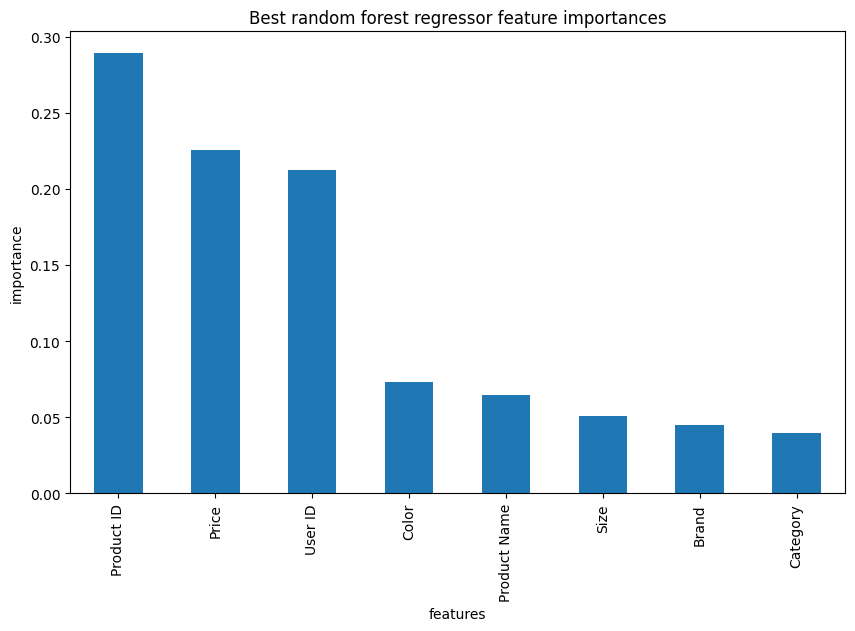

In [30]:
#Plot a barplot of the random forest's feature importances,
#assigning the `feature_importances_` attribute of 
#`rf_grid_cv.best_estimator_.named_steps.randomforestregressor` to the name `imps` to then
#create a pandas Series object of the feature importances, with the index given by the
#training data column names, sorting the values in descending order
plt.subplots(figsize=(10, 6))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

Product ID      0.288909
Price           0.225393
User ID         0.212169
Color           0.073503
Product Name    0.064346
Size            0.050768
Brand           0.045226
Category        0.039686
dtype: float64


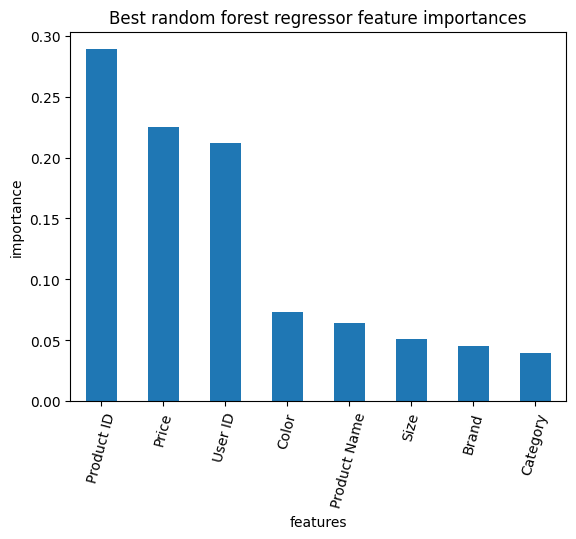

In [31]:
# Get the top N important features (e.g., top 3)
top_n = 20
top_features = rf_feat_imps.head(top_n)

# Print top N features
print(top_features)

top_features.plot(kind='bar')
plt.xticks(rotation=75)
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

A bar plot of feature importances above helps us identify following features contribute most to a model’s predictions:
Product ID, Price, User ID, Color, Product Name are all top features.

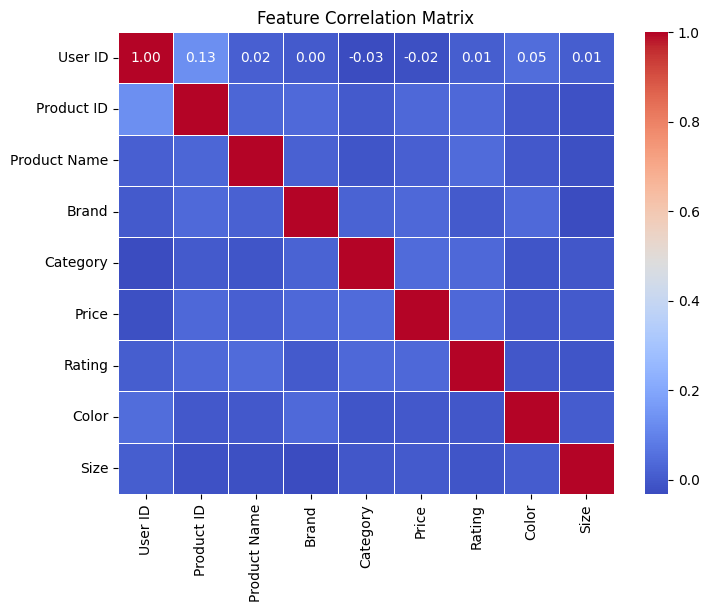

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pearson correlation matrix
corr_matrix = df_new.corr(method='pearson')

# Plotting the correlation matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

In [33]:
# Predict on the test set
y_pred = rf_grid_cv.predict(X_test)

# Display predicted ratings
print(y_pred)

[2.88193124 2.94519872 3.05064541 2.80505617 2.80729661 2.87951594
 2.95859199 3.05912001 2.8762239  2.95470582 3.16730695 2.96687118
 3.01356618 2.84272542 3.12905867 2.96213391 3.06061693 2.99378364
 2.7291026  3.13795117 2.89924106 3.06261184 2.84400651 2.95808542
 2.92503034 2.98201134 2.86761383 3.08551951 2.98761996 3.02837954
 2.92720574 3.2304081  2.92107072 2.9110137  2.87734188 3.1043522
 3.06742061 3.04595124 2.92460651 2.9968559  2.86638857 3.23795579
 3.07664966 2.87336765 3.0079082  2.89103641 2.88103834 3.06154514
 3.224553   2.89552195 3.02786727 2.73323347 2.92263243 3.01077162
 2.9295841  3.07887372 3.12063122 3.01122287 2.85912623 2.99268137
 3.12490004 2.89181626 2.88981205 2.96881046 2.88273232 3.20411874
 2.89039317 2.93333915 3.2218428  3.05752032 3.07046989 2.94437081
 2.9565542  3.00907576 3.07705985 3.04760333 3.01511015 3.10785218
 2.99911943 2.99937564 3.148022   3.20112165 2.97586651 2.97466816
 3.08238844 3.04591735 3.21439997 2.87482543 3.16336153 3.04196

In [34]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 1.31
Mean Absolute Error: 0.98
RMSE: 1.14343396717896
R-squared: -0.01


This is an issue, R square still not significant.

In [35]:
# Calculate Adjusted R-squared
n = X_test.shape[0]
k = X_test.shape[1]
adjusted_r_squared = 1 - ((1 - r2) * (n - 1)) / (n - k - 1)
print("Adjusted R-squared: ", adjusted_r_squared)

Adjusted R-squared:  -0.038642539813463106


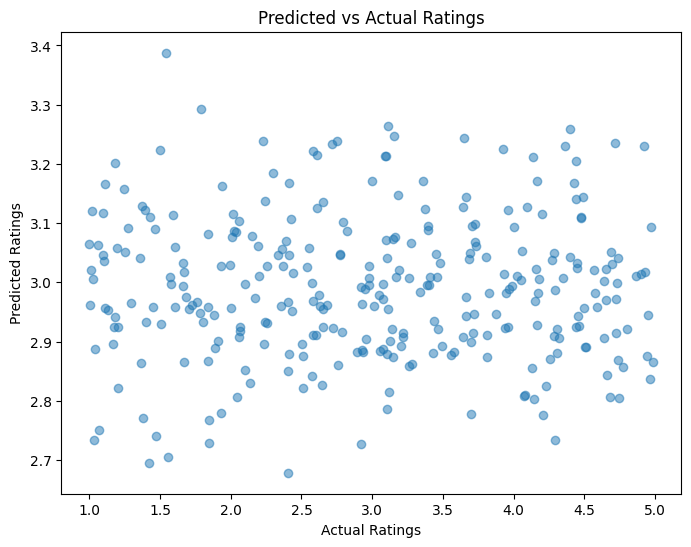

In [36]:
# Plot predicted vs actual ratings
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title("Predicted vs Actual Ratings")
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.show()

Using a Residuals Plot to check how well the model fits the data

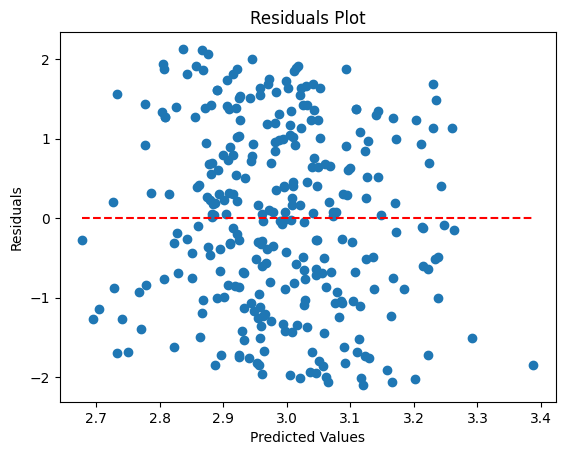

In [37]:
# Residuals plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.hlines(0, xmin=min(y_pred), xmax=max(y_pred), colors='red', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

# Analyzing Predicted Ratings Distribution

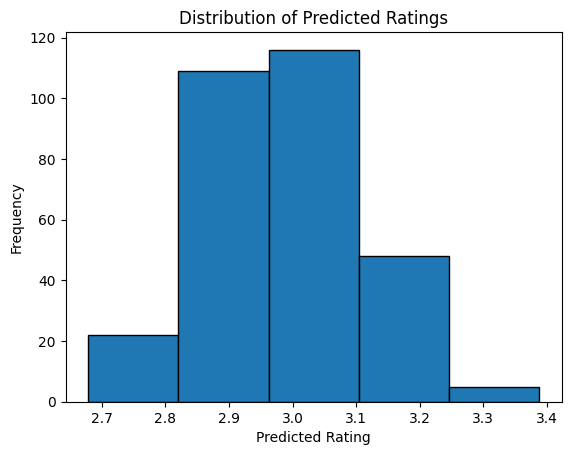

In [38]:
import matplotlib.pyplot as plt

# Simulate predicted ratings for users
predicted_ratings = y_pred

# Plot histogram of predicted ratings
plt.hist(predicted_ratings, bins=5, edgecolor='black')
plt.title("Distribution of Predicted Ratings")
plt.xlabel("Predicted Rating")
plt.ylabel("Frequency")
plt.show()

This mentions 3.0 is the most common rating and 2.5 comes second.

# Method 2 - XG BOOST MODEL

# Initialize, Build and Train the XGBoost Model

In [39]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', 
                             n_estimators=100, 
                             max_depth=6, 
                             learning_rate=0.1, 
                             random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Assess performance using RMSE, MAE, MSE

In [40]:
# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")
print(f'Mean Squared Error: {mse}')


Mean Absolute Error (MAE): 1.0823710592174474
R-squared: -0.30086506453372985
RMSE: 1.2971292756650474
Mean Squared Error: 1.6825443577873307


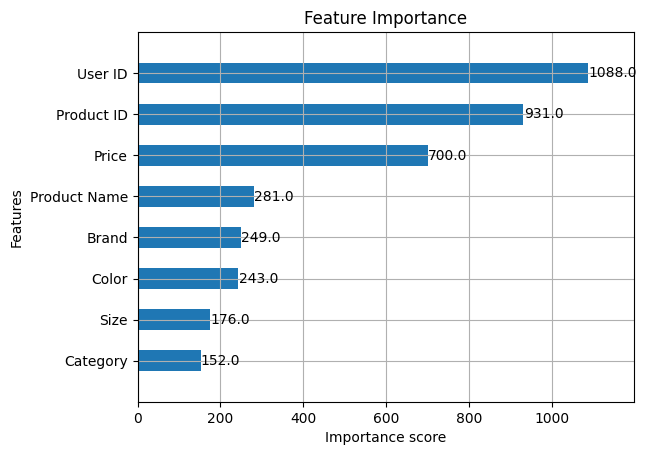

In [41]:
# Plot feature importance
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=10, height=0.5)
plt.title('Feature Importance')
plt.show()

# Method 3 - CATBOOST MODEL

Here we are predicting predicting a target like ratings (a continuous variable) based on a variety of features (both numerical and categorical) features such as Price (numerical), Product Name, User ID, Category, Size, Color, Brand (categorical).

In [42]:
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define target and features
X = df.drop(columns=['Rating'])
y = df['Rating']

# Categorical features
categorical_features = ['User ID', 'Product Name', 'Brand', 'Category', 'Color', 'Size']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create CatBoost model
model_cat = CatBoostRegressor(
    iterations=1000,        # Number of boosting rounds
    depth=10,               # Depth of trees
    learning_rate=0.1,      # Learning rate
    loss_function='RMSE',   # Loss function for regression
    cat_features=categorical_features,  # Specify which features are categorical
    verbose=200             # Output every 200 iterations
)

# Train the model
model_cat.fit(X_train, y_train)

# Make predictions
y_pred_cat = model_cat.predict(X_test)

y_pred_cat

0:	learn: 1.1271127	total: 144ms	remaining: 2m 24s
200:	learn: 0.2126023	total: 9.56s	remaining: 38s
400:	learn: 0.0408425	total: 19.7s	remaining: 29.4s
600:	learn: 0.0091483	total: 31.1s	remaining: 20.6s
800:	learn: 0.0021246	total: 42.8s	remaining: 10.6s
999:	learn: 0.0006728	total: 54.6s	remaining: 0us


array([2.86024265, 3.0135275 , 3.04387003, 2.92618132, 2.79819699,
       2.86710645, 3.10965106, 2.98111996, 3.06530415, 3.16139732,
       3.27274822, 3.04851977, 3.14188895, 3.35205994, 3.33870917,
       3.04545086, 3.43585709, 2.96443852, 2.85800071, 2.86711157,
       2.72899619, 2.88956217, 3.08204445, 3.05157333, 2.71053707,
       2.8968089 , 3.05136956, 3.64117743, 3.05824284, 2.90642078,
       3.26039056, 2.95146014, 2.72783963, 2.95490008, 2.93316141,
       2.62044958, 3.18498137, 2.65395764, 3.28266014, 3.16091055,
       3.3037404 , 3.16088814, 2.72490718, 3.89639684, 2.94226227,
       2.84662578, 3.38390587, 3.18304556, 2.68160178, 3.24335973,
       2.96592967, 3.25694128, 3.24966009, 3.33941739, 3.42499461,
       3.18685015, 3.02528875, 3.16763998, 3.07114365, 2.89732835,
       3.02578454, 3.07874867, 3.15623594, 3.26141923, 3.08982408,
       2.95077634, 2.86712751, 3.24885546, 3.13362751, 2.94790858,
       2.84611375, 2.49433753, 3.03180613, 3.32940359, 2.80908

In [43]:
# Evaluate performance (RMSE)
rmse = mean_squared_error(y_test, y_pred_cat)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 1.5307041383006932


In [44]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_cat)
print(f"R-squared: {r2}")

R-squared: -0.0763199744283769


This seems like a reasonable RMSE, even though R-square is not that significant but RMSE is pretty reasonable.

In [45]:
# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred_cat)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_cat))
mse = mean_squared_error(y_test, y_pred_cat)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")
print(f'Mean Squared Error: {mse}')

Mean Absolute Error (MAE): 1.0744127080609798
R-squared: -0.14704192587460985
RMSE: 1.2372162859826463
Mean Squared Error: 1.5307041383006932


In [46]:
# Calculate Adjusted R-squared
n = X_test.shape[0]
k = X_test.shape[1]
adjusted_r_squared = 1 - ((1 - r2) * (n - 1)) / (n - k - 1)
print("Adjusted R-squared: ", adjusted_r_squared)

Adjusted R-squared:  -0.17857572452408377


In [47]:
# Get feature importance
feature_importance = model_cat.get_feature_importance()

# Create a DataFrame for easy visualization
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance
print(importance_df)


        Feature  Importance
6         Color   16.397684
4      Category   16.279553
7          Size   14.774949
2  Product Name   14.630567
3         Brand   14.531810
0       User ID    8.449368
1    Product ID    7.830425
5         Price    7.105646


# Visualize Feature Importance

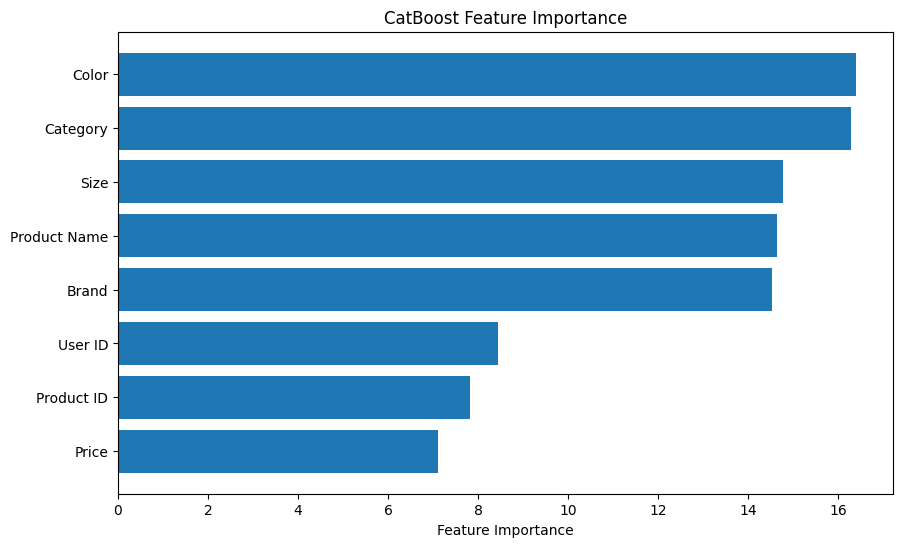

In [48]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('CatBoost Feature Importance')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

# Hyperparameter search using GridSearchCV

In [49]:
# Define the hyperparameter grid
param_grid = {
    'iterations': [500, 1000, 1500],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [6, 8, 10],
    'l2_leaf_reg': [1, 3, 5],
    'bagging_temperature': [0.0, 0.5, 1.0],
    'od_wait': [300],
}

# Grid search
grid_search = GridSearchCV(estimator=model_cat, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score (RMSE)
best_params = grid_search.best_params_
best_rmse = -grid_search.best_score_  # Negate because scoring is negative RMSE
print(f"Best Hyperparameters: {best_params}")
print(f"Best RMSE: {best_rmse}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
0:	learn: 1.1235582	total: 124ms	remaining: 1m 1s
200:	learn: 1.0545240	total: 2.53s	remaining: 3.76s
400:	learn: 0.9938254	total: 4.6s	remaining: 1.14s
499:	learn: 0.9622234	total: 5.65s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.01, od_wait=300; total time=   6.4s
0:	learn: 1.1448082	total: 8.56ms	remaining: 4.27s
200:	learn: 1.0752157	total: 2.2s	remaining: 3.28s
400:	learn: 1.0144843	total: 4.2s	remaining: 1.04s
499:	learn: 0.9828743	total: 5.38s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.01, od_wait=300; total time=   6.2s
0:	learn: 1.1391186	total: 31.8ms	remaining: 15.9s
200:	learn: 0.7865777	total: 2.47s	remaining: 3.67s
400:	learn: 0.5319973	total: 5.38s	remaining: 1.33s
499:	learn: 0.4492881	total: 7.17s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=6, iterations=500, l2_leaf_reg=1,

0:	learn: 1.1405042	total: 187ms	remaining: 1m 33s
200:	learn: 1.0732223	total: 2.46s	remaining: 3.66s
400:	learn: 0.9992266	total: 4.68s	remaining: 1.16s
499:	learn: 0.9690640	total: 5.72s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.01, od_wait=300; total time=   6.4s
0:	learn: 1.1305942	total: 16.8ms	remaining: 8.37s
200:	learn: 0.8014701	total: 2.4s	remaining: 3.58s
400:	learn: 0.5475549	total: 4.99s	remaining: 1.23s
499:	learn: 0.4557036	total: 6.28s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.05, od_wait=300; total time=   7.0s
0:	learn: 1.1192794	total: 16.9ms	remaining: 8.41s
200:	learn: 0.5725475	total: 2.62s	remaining: 3.9s
400:	learn: 0.3160020	total: 5.79s	remaining: 1.43s
499:	learn: 0.2418187	total: 7.36s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.1, od_wait=300; total time=   8.2s
0:	learn: 

0:	learn: 1.1317697	total: 187ms	remaining: 1m 33s
200:	learn: 1.0640026	total: 2.52s	remaining: 3.75s
400:	learn: 0.9936040	total: 4.59s	remaining: 1.13s
499:	learn: 0.9615579	total: 5.63s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.01, od_wait=300; total time=   6.2s
0:	learn: 1.1239180	total: 20.1ms	remaining: 10s
200:	learn: 0.7823955	total: 2.41s	remaining: 3.58s
400:	learn: 0.5288974	total: 5.13s	remaining: 1.27s
499:	learn: 0.4434263	total: 6.49s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.05, od_wait=300; total time=   7.3s
0:	learn: 1.1221033	total: 8.49ms	remaining: 4.24s
200:	learn: 0.5425103	total: 2.57s	remaining: 3.83s
400:	learn: 0.2887831	total: 5.85s	remaining: 1.44s
499:	learn: 0.2191075	total: 7.36s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.1, od_wait=300; total time=   8.3s
0:	learn: 

0:	learn: 1.1254187	total: 185ms	remaining: 1m 32s
200:	learn: 1.0480554	total: 2.53s	remaining: 3.77s
400:	learn: 0.9854929	total: 4.57s	remaining: 1.13s
499:	learn: 0.9541859	total: 5.65s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.01, od_wait=300; total time=   6.3s
0:	learn: 1.1216241	total: 6.89ms	remaining: 3.44s
200:	learn: 0.8068742	total: 2.38s	remaining: 3.55s
400:	learn: 0.5818440	total: 5.01s	remaining: 1.24s
499:	learn: 0.5088196	total: 6.35s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.05, od_wait=300; total time=   7.0s
0:	learn: 1.1428459	total: 32.5ms	remaining: 16.2s
200:	learn: 0.8225464	total: 2.53s	remaining: 3.77s
400:	learn: 0.5675736	total: 5.7s	remaining: 1.41s
499:	learn: 0.4709658	total: 7.28s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.05, od_wait=300; total time=   8.2s
0:	learn

0:	learn: 1.1351721	total: 42.6ms	remaining: 21.2s
200:	learn: 0.2546135	total: 7.4s	remaining: 11s
400:	learn: 0.0595911	total: 15.5s	remaining: 3.82s
499:	learn: 0.0331751	total: 19.5s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=8, iterations=500, l2_leaf_reg=1, learning_rate=0.1, od_wait=300; total time=  20.6s
0:	learn: 1.1405300	total: 43.3ms	remaining: 21.6s
200:	learn: 1.0351519	total: 6.05s	remaining: 9s
400:	learn: 0.9360357	total: 11.6s	remaining: 2.86s
499:	learn: 0.8880487	total: 14.7s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=8, iterations=500, l2_leaf_reg=3, learning_rate=0.01, od_wait=300; total time=  15.9s
0:	learn: 1.1309602	total: 49.6ms	remaining: 24.8s
200:	learn: 0.6700623	total: 6.51s	remaining: 9.69s
400:	learn: 0.3880042	total: 16.3s	remaining: 4.02s
499:	learn: 0.2986689	total: 21.3s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=8, iterations=500, l2_leaf_reg=3, learning_rate=0.05, od_wait=300; total time=  22.5s
0:	learn: 1.11

400:	learn: 0.0454241	total: 15.6s	remaining: 3.85s
499:	learn: 0.0239382	total: 19.4s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=8, iterations=500, l2_leaf_reg=1, learning_rate=0.1, od_wait=300; total time=  20.6s
0:	learn: 1.1250531	total: 46.5ms	remaining: 23.2s
200:	learn: 1.0329761	total: 5.33s	remaining: 7.94s
400:	learn: 0.9386628	total: 10.8s	remaining: 2.68s
499:	learn: 0.8946767	total: 13.6s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=8, iterations=500, l2_leaf_reg=3, learning_rate=0.01, od_wait=300; total time=  14.5s
0:	learn: 1.1446895	total: 62.4ms	remaining: 31.2s
200:	learn: 1.0528851	total: 5.9s	remaining: 8.78s
400:	learn: 0.9556835	total: 12.4s	remaining: 3.05s
499:	learn: 0.9120634	total: 15.5s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=8, iterations=500, l2_leaf_reg=3, learning_rate=0.01, od_wait=300; total time=  16.6s
0:	learn: 1.1392425	total: 39.5ms	remaining: 19.7s
200:	learn: 0.6646939	total: 7.66s	remaining: 11.4s
400:	lear

400:	learn: 0.9534389	total: 11s	remaining: 2.72s
499:	learn: 0.9117932	total: 13.8s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=8, iterations=500, l2_leaf_reg=3, learning_rate=0.01, od_wait=300; total time=  14.7s
0:	learn: 1.1207535	total: 53.4ms	remaining: 26.6s
200:	learn: 0.6833574	total: 6.38s	remaining: 9.5s
400:	learn: 0.4213069	total: 14.1s	remaining: 3.48s
499:	learn: 0.3274034	total: 17.8s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=8, iterations=500, l2_leaf_reg=3, learning_rate=0.05, od_wait=300; total time=  18.8s
0:	learn: 1.1422505	total: 33.8ms	remaining: 16.9s
200:	learn: 0.7152499	total: 8.09s	remaining: 12s
400:	learn: 0.4032273	total: 17.8s	remaining: 4.4s
499:	learn: 0.3116467	total: 22.4s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=8, iterations=500, l2_leaf_reg=3, learning_rate=0.05, od_wait=300; total time=  23.8s
0:	learn: 1.1376745	total: 41.5ms	remaining: 20.7s
200:	learn: 0.3521324	total: 9.34s	remaining: 13.9s
400:	learn: 0

499:	learn: 0.0276202	total: 19.4s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=8, iterations=500, l2_leaf_reg=1, learning_rate=0.1, od_wait=300; total time=  20.7s
0:	learn: 1.1318448	total: 45ms	remaining: 22.5s
200:	learn: 1.0349120	total: 5.64s	remaining: 8.38s
400:	learn: 0.9435812	total: 11.7s	remaining: 2.89s
499:	learn: 0.8977764	total: 14.8s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=8, iterations=500, l2_leaf_reg=3, learning_rate=0.01, od_wait=300; total time=  15.9s
0:	learn: 1.1220972	total: 78.6ms	remaining: 39.2s
200:	learn: 0.6326045	total: 6.94s	remaining: 10.3s
400:	learn: 0.3721197	total: 15.9s	remaining: 3.94s
499:	learn: 0.2896733	total: 21s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=8, iterations=500, l2_leaf_reg=3, learning_rate=0.05, od_wait=300; total time=  22.3s
0:	learn: 1.1175306	total: 50.4ms	remaining: 25.2s
200:	learn: 0.3913533	total: 8.55s	remaining: 12.7s
400:	learn: 0.1459756	total: 18.1s	remaining: 4.47s
499:	learn: 

400:	learn: 0.1627571	total: 49.2s	remaining: 12.2s
499:	learn: 0.0996698	total: 1m 2s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=10, iterations=500, l2_leaf_reg=3, learning_rate=0.05, od_wait=300; total time= 1.1min
0:	learn: 1.1298806	total: 67.8ms	remaining: 33.8s
200:	learn: 0.1647475	total: 24.5s	remaining: 36.5s
400:	learn: 0.0267937	total: 51s	remaining: 12.6s
499:	learn: 0.0121672	total: 1m 4s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=10, iterations=500, l2_leaf_reg=3, learning_rate=0.1, od_wait=300; total time= 1.1min
0:	learn: 1.1248712	total: 141ms	remaining: 1m 10s
200:	learn: 1.0125238	total: 17.3s	remaining: 25.7s
400:	learn: 0.9161570	total: 33.6s	remaining: 8.3s
499:	learn: 0.8596641	total: 44.1s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=10, iterations=500, l2_leaf_reg=5, learning_rate=0.01, od_wait=300; total time=  45.3s
0:	learn: 1.1452773	total: 1.48ms	remaining: 736ms
200:	learn: 1.0254154	total: 18.4s	remaining: 27.4s
400:	lea

[CV] END bagging_temperature=0.0, depth=10, iterations=500, l2_leaf_reg=3, learning_rate=0.1, od_wait=300; total time= 1.1min
0:	learn: 1.1355316	total: 174ms	remaining: 1m 26s
200:	learn: 0.1866004	total: 24.7s	remaining: 36.8s
400:	learn: 0.0308442	total: 51.2s	remaining: 12.6s
499:	learn: 0.0127794	total: 1m 4s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=10, iterations=500, l2_leaf_reg=3, learning_rate=0.1, od_wait=300; total time= 1.1min
0:	learn: 1.1223931	total: 62.8ms	remaining: 31.3s
200:	learn: 0.5909286	total: 21.9s	remaining: 32.5s
400:	learn: 0.2871083	total: 49.5s	remaining: 12.2s
499:	learn: 0.2089272	total: 1m 2s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=10, iterations=500, l2_leaf_reg=5, learning_rate=0.05, od_wait=300; total time= 1.1min
0:	learn: 1.1451553	total: 1.22ms	remaining: 609ms
200:	learn: 0.6303774	total: 21.3s	remaining: 32s
400:	learn: 0.2896928	total: 48.5s	remaining: 12s
499:	learn: 0.1946740	total: 1m 2s	remaining: 0us
[CV] END b

[CV] END bagging_temperature=0.0, depth=10, iterations=500, l2_leaf_reg=3, learning_rate=0.1, od_wait=300; total time= 1.1min
0:	learn: 1.1237163	total: 65.7ms	remaining: 32.8s
200:	learn: 1.0191351	total: 16.5s	remaining: 24.5s
400:	learn: 0.9094891	total: 35.1s	remaining: 8.66s
499:	learn: 0.8606144	total: 44.2s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=10, iterations=500, l2_leaf_reg=5, learning_rate=0.01, od_wait=300; total time=  45.4s
0:	learn: 1.1406838	total: 45.5ms	remaining: 22.7s
200:	learn: 1.0296985	total: 17.6s	remaining: 26.2s
400:	learn: 0.9172523	total: 36.2s	remaining: 8.94s
499:	learn: 0.8618439	total: 46.8s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=10, iterations=500, l2_leaf_reg=5, learning_rate=0.01, od_wait=300; total time=  48.1s
0:	learn: 1.1312051	total: 45ms	remaining: 22.4s
200:	learn: 0.6186371	total: 20.4s	remaining: 30.3s
400:	learn: 0.3218797	total: 46.4s	remaining: 11.4s
499:	learn: 0.2263378	total: 59.1s	remaining: 0us
[CV] EN

[CV] END bagging_temperature=0.0, depth=10, iterations=500, l2_leaf_reg=3, learning_rate=0.05, od_wait=300; total time= 1.1min
0:	learn: 1.1337565	total: 116ms	remaining: 57.6s
200:	learn: 0.1618483	total: 24.4s	remaining: 36.3s
400:	learn: 0.0245084	total: 50.6s	remaining: 12.5s
499:	learn: 0.0100348	total: 1m 3s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=10, iterations=500, l2_leaf_reg=3, learning_rate=0.1, od_wait=300; total time= 1.1min
0:	learn: 1.1318945	total: 101ms	remaining: 50.2s
200:	learn: 1.0244760	total: 16.9s	remaining: 25.1s
400:	learn: 0.9190395	total: 34.3s	remaining: 8.47s
499:	learn: 0.8672603	total: 44s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=10, iterations=500, l2_leaf_reg=5, learning_rate=0.01, od_wait=300; total time=  45.5s
0:	learn: 1.1211890	total: 138ms	remaining: 1m 9s
200:	learn: 0.5772863	total: 21.8s	remaining: 32.5s
400:	learn: 0.2582646	total: 48.3s	remaining: 11.9s
499:	learn: 0.1800470	total: 1m 1s	remaining: 0us
[CV] END b

0:	learn: 1.1310598	total: 8.01ms	remaining: 4s
200:	learn: 0.8948190	total: 3.61s	remaining: 5.37s
400:	learn: 0.6812182	total: 8.22s	remaining: 2.03s
499:	learn: 0.5890025	total: 10.8s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=6, iterations=500, l2_leaf_reg=3, learning_rate=0.05, od_wait=300; total time=  11.8s
0:	learn: 1.1209461	total: 34.8ms	remaining: 17.4s
200:	learn: 0.6790216	total: 4.47s	remaining: 6.65s
400:	learn: 0.4510957	total: 9.13s	remaining: 2.25s
499:	learn: 0.3633616	total: 11.4s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=6, iterations=500, l2_leaf_reg=3, learning_rate=0.1, od_wait=300; total time=  12.7s
0:	learn: 1.1386473	total: 24.1ms	remaining: 12s
200:	learn: 0.6818061	total: 4.28s	remaining: 6.37s
400:	learn: 0.4229063	total: 8.9s	remaining: 2.2s
499:	learn: 0.3340154	total: 11.1s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=6, iterations=500, l2_leaf_reg=3, learning_rate=0.1, od_wait=300; total time=  12.5s
0:	learn: 1.1319

400:	learn: 0.3906160	total: 9.04s	remaining: 2.23s
499:	learn: 0.3032939	total: 11s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=6, iterations=500, l2_leaf_reg=3, learning_rate=0.1, od_wait=300; total time=  12.3s
0:	learn: 1.1238100	total: 7.34ms	remaining: 3.66s
200:	learn: 1.0817455	total: 3.44s	remaining: 5.12s
400:	learn: 1.0406347	total: 6.59s	remaining: 1.63s
499:	learn: 1.0203075	total: 8.23s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=6, iterations=500, l2_leaf_reg=5, learning_rate=0.01, od_wait=300; total time=   9.4s
0:	learn: 1.1406838	total: 6.91ms	remaining: 3.45s
200:	learn: 1.0930397	total: 3.65s	remaining: 5.44s
400:	learn: 1.0507281	total: 7.46s	remaining: 1.84s
499:	learn: 1.0271419	total: 9.44s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=6, iterations=500, l2_leaf_reg=5, learning_rate=0.01, od_wait=300; total time=  10.7s
0:	learn: 1.1312702	total: 7.85ms	remaining: 3.92s
200:	learn: 0.9230867	total: 3.77s	remaining: 5.6s
400:	learn:

0:	learn: 1.1391630	total: 30.3ms	remaining: 15.1s
200:	learn: 0.7240798	total: 4.27s	remaining: 6.36s
400:	learn: 0.4776568	total: 8.87s	remaining: 2.19s
499:	learn: 0.3771897	total: 11.2s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=6, iterations=500, l2_leaf_reg=5, learning_rate=0.1, od_wait=300; total time=  12.6s
0:	learn: 1.1317697	total: 37.9ms	remaining: 37.9s
200:	learn: 1.0640026	total: 3.55s	remaining: 14.1s
400:	learn: 0.9936040	total: 7.25s	remaining: 10.8s
600:	learn: 0.9246755	total: 11s	remaining: 7.28s
800:	learn: 0.8549124	total: 15.5s	remaining: 3.85s
999:	learn: 0.7946541	total: 19.7s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=6, iterations=1000, l2_leaf_reg=1, learning_rate=0.01, od_wait=300; total time=  21.8s
0:	learn: 1.1239180	total: 7.43ms	remaining: 7.42s
200:	learn: 0.7823955	total: 4.21s	remaining: 16.8s
400:	learn: 0.5288974	total: 8.99s	remaining: 13.4s
600:	learn: 0.3730955	total: 13.7s	remaining: 9.1s
800:	learn: 0.2702556	total: 1

[CV] END bagging_temperature=0.5, depth=6, iterations=1000, l2_leaf_reg=1, learning_rate=0.05, od_wait=300; total time=  25.9s
0:	learn: 1.1374387	total: 10.5ms	remaining: 10.5s
200:	learn: 0.5528463	total: 4.06s	remaining: 16.2s
400:	learn: 0.2891349	total: 8.84s	remaining: 13.2s
600:	learn: 0.1639139	total: 13.4s	remaining: 8.93s
800:	learn: 0.0965616	total: 18.4s	remaining: 4.56s
999:	learn: 0.0581763	total: 22.9s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=6, iterations=1000, l2_leaf_reg=1, learning_rate=0.1, od_wait=300; total time=  25.5s
0:	learn: 1.1318648	total: 7.18ms	remaining: 7.17s
200:	learn: 1.0795435	total: 3.57s	remaining: 14.2s
400:	learn: 1.0296880	total: 7.19s	remaining: 10.7s
600:	learn: 0.9728289	total: 10.9s	remaining: 7.24s
800:	learn: 0.9160182	total: 15.3s	remaining: 3.79s
999:	learn: 0.8681527	total: 19.6s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=6, iterations=1000, l2_leaf_reg=3, learning_rate=0.01, od_wait=300; total time=  21.7s
0:

499:	learn: 0.0946500	total: 25s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=8, iterations=500, l2_leaf_reg=3, learning_rate=0.1, od_wait=300; total time=  26.5s
0:	learn: 1.1223931	total: 67.9ms	remaining: 33.9s
200:	learn: 0.7552980	total: 8.56s	remaining: 12.7s
400:	learn: 0.4980497	total: 18.8s	remaining: 4.64s
499:	learn: 0.4191631	total: 23.9s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=8, iterations=500, l2_leaf_reg=5, learning_rate=0.05, od_wait=300; total time=  24.8s
0:	learn: 1.1451553	total: 29.9ms	remaining: 14.9s
200:	learn: 0.8065200	total: 8.92s	remaining: 13.3s
400:	learn: 0.4965777	total: 19.1s	remaining: 4.73s
499:	learn: 0.3946069	total: 24.4s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=8, iterations=500, l2_leaf_reg=5, learning_rate=0.05, od_wait=300; total time=  25.7s
0:	learn: 1.1391630	total: 70.9ms	remaining: 35.4s
200:	learn: 0.5182910	total: 9.43s	remaining: 14s
400:	learn: 0.2366586	total: 20.1s	remaining: 4.97s
499:	learn: 

400:	learn: 0.4836372	total: 18.9s	remaining: 4.66s
499:	learn: 0.3865553	total: 24s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=8, iterations=500, l2_leaf_reg=5, learning_rate=0.05, od_wait=300; total time=  25.2s
0:	learn: 1.1200130	total: 33.7ms	remaining: 16.8s
200:	learn: 0.4263544	total: 10.1s	remaining: 15s
400:	learn: 0.1754976	total: 20.1s	remaining: 4.96s
499:	learn: 0.1208079	total: 25.1s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=8, iterations=500, l2_leaf_reg=5, learning_rate=0.1, od_wait=300; total time=  26.3s
0:	learn: 1.1228872	total: 68.8ms	remaining: 1m 8s
200:	learn: 0.9844343	total: 7.83s	remaining: 31.1s
400:	learn: 0.8642169	total: 16.1s	remaining: 24.1s
600:	learn: 0.7506683	total: 25.5s	remaining: 16.9s
800:	learn: 0.6383738	total: 35.8s	remaining: 8.89s
999:	learn: 0.5424861	total: 46.3s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=8, iterations=1000, l2_leaf_reg=1, learning_rate=0.01, od_wait=300; total time=  48.3s
0:	learn: 

[CV] END bagging_temperature=0.5, depth=8, iterations=1000, l2_leaf_reg=1, learning_rate=0.05, od_wait=300; total time=  53.5s
0:	learn: 1.1176200	total: 58.3ms	remaining: 58.2s
200:	learn: 0.2170386	total: 9.75s	remaining: 38.7s
400:	learn: 0.0454241	total: 20.1s	remaining: 30s
600:	learn: 0.0132892	total: 30.4s	remaining: 20.2s
800:	learn: 0.0042261	total: 40.8s	remaining: 10.1s
999:	learn: 0.0012721	total: 51s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=8, iterations=1000, l2_leaf_reg=1, learning_rate=0.1, od_wait=300; total time=  53.8s
0:	learn: 1.1233848	total: 74.6ms	remaining: 1m 14s
200:	learn: 1.0358952	total: 7.21s	remaining: 28.7s
400:	learn: 0.9534389	total: 14.6s	remaining: 21.8s
600:	learn: 0.8701641	total: 23s	remaining: 15.2s
800:	learn: 0.7739730	total: 32.6s	remaining: 8.09s
999:	learn: 0.6909299	total: 43.2s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=8, iterations=1000, l2_leaf_reg=3, learning_rate=0.01, od_wait=300; total time=  45.4s
0:	lear

400:	learn: 0.3721197	total: 20s	remaining: 29.9s
600:	learn: 0.2271134	total: 30.5s	remaining: 20.3s
800:	learn: 0.1369164	total: 41.2s	remaining: 10.2s
999:	learn: 0.0810703	total: 51.8s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=8, iterations=1000, l2_leaf_reg=3, learning_rate=0.05, od_wait=300; total time=  54.2s
0:	learn: 1.1175306	total: 70ms	remaining: 1m 9s
200:	learn: 0.3913533	total: 9.68s	remaining: 38.5s
400:	learn: 0.1459756	total: 19.7s	remaining: 29.4s
600:	learn: 0.0609513	total: 30.1s	remaining: 20s
800:	learn: 0.0279751	total: 41s	remaining: 10.2s
999:	learn: 0.0126560	total: 51.8s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=8, iterations=1000, l2_leaf_reg=3, learning_rate=0.1, od_wait=300; total time=  54.2s
0:	learn: 1.1392863	total: 64.1ms	remaining: 1m 4s
200:	learn: 0.4238132	total: 9.68s	remaining: 38.5s
400:	learn: 0.1502709	total: 20.1s	remaining: 30.1s
600:	learn: 0.0638694	total: 30.7s	remaining: 20.4s
800:	learn: 0.0274818	total: 41.3

[CV] END bagging_temperature=0.5, depth=10, iterations=500, l2_leaf_reg=5, learning_rate=0.1, od_wait=300; total time= 1.1min
0:	learn: 1.1244614	total: 132ms	remaining: 2m 12s
200:	learn: 0.8795093	total: 20.5s	remaining: 1m 21s
400:	learn: 0.6735352	total: 42.6s	remaining: 1m 3s
600:	learn: 0.4973320	total: 1m 7s	remaining: 44.7s
800:	learn: 0.3477403	total: 1m 35s	remaining: 23.7s
999:	learn: 0.2466990	total: 2m 3s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=10, iterations=1000, l2_leaf_reg=1, learning_rate=0.01, od_wait=300; total time= 2.1min
0:	learn: 1.1150607	total: 150ms	remaining: 2m 29s
200:	learn: 0.2752656	total: 24.8s	remaining: 1m 38s
400:	learn: 0.0628389	total: 52.9s	remaining: 1m 18s
600:	learn: 0.0187804	total: 1m 20s	remaining: 53.5s
800:	learn: 0.0051954	total: 1m 48s	remaining: 26.9s
999:	learn: 0.0015204	total: 2m 17s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=10, iterations=1000, l2_leaf_reg=1, learning_rate=0.05, od_wait=300; total time= 

0:	learn: 1.1443085	total: 161ms	remaining: 2m 40s
200:	learn: 0.9809596	total: 23.3s	remaining: 1m 32s
400:	learn: 0.8537626	total: 45.6s	remaining: 1m 8s
600:	learn: 0.7212180	total: 1m 10s	remaining: 46.7s
800:	learn: 0.5859099	total: 1m 41s	remaining: 25.2s
999:	learn: 0.4882982	total: 2m 13s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=10, iterations=1000, l2_leaf_reg=3, learning_rate=0.01, od_wait=300; total time= 2.3min
0:	learn: 1.1372572	total: 110ms	remaining: 1m 50s
200:	learn: 0.4649680	total: 25.6s	remaining: 1m 41s
400:	learn: 0.1627571	total: 56.3s	remaining: 1m 24s
600:	learn: 0.0644645	total: 1m 27s	remaining: 58.1s
800:	learn: 0.0260541	total: 1m 58s	remaining: 29.5s
999:	learn: 0.0113194	total: 2m 29s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=10, iterations=1000, l2_leaf_reg=3, learning_rate=0.05, od_wait=300; total time= 2.5min
0:	learn: 1.1298806	total: 71.7ms	remaining: 1m 11s
200:	learn: 0.1647475	total: 28.9s	remaining: 1m 54s
400:	learn: 

[CV] END bagging_temperature=0.5, depth=10, iterations=1000, l2_leaf_reg=1, learning_rate=0.01, od_wait=300; total time= 2.2min
0:	learn: 1.1303673	total: 78.6ms	remaining: 1m 18s
200:	learn: 0.2709994	total: 24.8s	remaining: 1m 38s
400:	learn: 0.0638277	total: 52.5s	remaining: 1m 18s
600:	learn: 0.0162083	total: 1m 20s	remaining: 53.6s
800:	learn: 0.0044467	total: 1m 49s	remaining: 27.2s
999:	learn: 0.0013879	total: 2m 18s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=10, iterations=1000, l2_leaf_reg=1, learning_rate=0.05, od_wait=300; total time= 2.4min
0:	learn: 1.1127774	total: 174ms	remaining: 2m 54s
200:	learn: 0.0494032	total: 28.7s	remaining: 1m 54s
400:	learn: 0.0031182	total: 59.1s	remaining: 1m 28s
600:	learn: 0.0002608	total: 1m 30s	remaining: 1m
800:	learn: 0.0000316	total: 2m 1s	remaining: 30.1s
999:	learn: 0.0000053	total: 2m 32s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=10, iterations=1000, l2_leaf_reg=1, learning_rate=0.1, od_wait=300; total time=

999:	learn: 0.0001794	total: 2m 36s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=10, iterations=1000, l2_leaf_reg=3, learning_rate=0.1, od_wait=300; total time= 2.7min
0:	learn: 1.1318945	total: 36.3ms	remaining: 36.2s
200:	learn: 1.0244760	total: 20.1s	remaining: 1m 19s
400:	learn: 0.9190395	total: 39.6s	remaining: 59.2s
600:	learn: 0.8091215	total: 1m 2s	remaining: 41.8s
800:	learn: 0.6957316	total: 1m 31s	remaining: 22.8s
999:	learn: 0.6011545	total: 2m 3s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=10, iterations=1000, l2_leaf_reg=5, learning_rate=0.01, od_wait=300; total time= 2.1min
0:	learn: 1.1211890	total: 128ms	remaining: 2m 8s
200:	learn: 0.5772863	total: 26.4s	remaining: 1m 44s
400:	learn: 0.2582646	total: 57.6s	remaining: 1m 26s
600:	learn: 0.1235149	total: 1m 28s	remaining: 58.6s
800:	learn: 0.0618808	total: 1m 59s	remaining: 29.7s
999:	learn: 0.0311681	total: 2m 31s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=10, iterations=1000, l2_leaf_r

499:	learn: 0.6670305	total: 12.3s	remaining: 0us
[CV] END bagging_temperature=1.0, depth=6, iterations=500, l2_leaf_reg=5, learning_rate=0.05, od_wait=300; total time=  13.6s
0:	learn: 1.1391630	total: 12.3ms	remaining: 6.12s
200:	learn: 0.7240798	total: 4.86s	remaining: 7.24s
400:	learn: 0.4776568	total: 9.94s	remaining: 2.46s
499:	learn: 0.3771897	total: 12.6s	remaining: 0us
[CV] END bagging_temperature=1.0, depth=6, iterations=500, l2_leaf_reg=5, learning_rate=0.1, od_wait=300; total time=  14.1s
0:	learn: 1.1317697	total: 41.2ms	remaining: 41.1s
200:	learn: 1.0640026	total: 3.9s	remaining: 15.5s
400:	learn: 0.9936040	total: 7.92s	remaining: 11.8s
600:	learn: 0.9246755	total: 12.1s	remaining: 8s
800:	learn: 0.8549124	total: 16.9s	remaining: 4.2s
999:	learn: 0.7946541	total: 21.8s	remaining: 0us
[CV] END bagging_temperature=1.0, depth=6, iterations=1000, l2_leaf_reg=1, learning_rate=0.01, od_wait=300; total time=  24.2s
0:	learn: 1.1239180	total: 16.8ms	remaining: 16.8s
200:	learn: 

[CV] END bagging_temperature=1.0, depth=6, iterations=1000, l2_leaf_reg=1, learning_rate=0.1, od_wait=300; total time=  27.8s
0:	learn: 1.1318648	total: 7.22ms	remaining: 7.22s
200:	learn: 1.0795435	total: 4.23s	remaining: 16.8s
400:	learn: 1.0296880	total: 8.12s	remaining: 12.1s
600:	learn: 0.9728289	total: 12.5s	remaining: 8.33s
800:	learn: 0.9160182	total: 17.3s	remaining: 4.31s
999:	learn: 0.8681527	total: 22s	remaining: 0us
[CV] END bagging_temperature=1.0, depth=6, iterations=1000, l2_leaf_reg=3, learning_rate=0.01, od_wait=300; total time=  24.1s
0:	learn: 1.1236246	total: 56.2ms	remaining: 56.2s
200:	learn: 0.8380025	total: 4.62s	remaining: 18.4s
400:	learn: 0.6235273	total: 9.94s	remaining: 14.8s
600:	learn: 0.4896396	total: 15.2s	remaining: 10.1s
800:	learn: 0.3928754	total: 20.6s	remaining: 5.13s
999:	learn: 0.3200787	total: 25.9s	remaining: 0us
[CV] END bagging_temperature=1.0, depth=6, iterations=1000, l2_leaf_reg=3, learning_rate=0.05, od_wait=300; total time=  28.2s
0:	l

600:	learn: 0.2649414	total: 15.3s	remaining: 10.1s
800:	learn: 0.1769748	total: 20.4s	remaining: 5.07s
999:	learn: 0.1206760	total: 25.5s	remaining: 0us
[CV] END bagging_temperature=1.0, depth=6, iterations=1000, l2_leaf_reg=3, learning_rate=0.1, od_wait=300; total time=  28.2s
0:	learn: 1.1319075	total: 7.36ms	remaining: 7.35s
200:	learn: 1.0914326	total: 3.97s	remaining: 15.8s
400:	learn: 1.0475429	total: 7.98s	remaining: 11.9s
600:	learn: 1.0049071	total: 12s	remaining: 7.96s
800:	learn: 0.9623263	total: 16.7s	remaining: 4.14s
999:	learn: 0.9258542	total: 21.4s	remaining: 0us
[CV] END bagging_temperature=1.0, depth=6, iterations=1000, l2_leaf_reg=5, learning_rate=0.01, od_wait=300; total time=  23.4s
0:	learn: 1.1240313	total: 7.59ms	remaining: 7.59s
200:	learn: 0.9063677	total: 4.31s	remaining: 17.1s
400:	learn: 0.7047506	total: 9.27s	remaining: 13.8s
600:	learn: 0.5604980	total: 14.3s	remaining: 9.47s
800:	learn: 0.4511783	total: 19.4s	remaining: 4.83s
999:	learn: 0.3714859	total

600:	learn: 0.3089120	total: 15.1s	remaining: 10s
800:	learn: 0.2211173	total: 20.3s	remaining: 5.04s
999:	learn: 0.1622107	total: 25.4s	remaining: 0us
[CV] END bagging_temperature=1.0, depth=6, iterations=1000, l2_leaf_reg=5, learning_rate=0.1, od_wait=300; total time=  27.8s
0:	learn: 1.1317697	total: 18.1ms	remaining: 27.1s
200:	learn: 1.0640026	total: 4.22s	remaining: 27.3s
400:	learn: 0.9936040	total: 8.3s	remaining: 22.7s
600:	learn: 0.9246755	total: 12.8s	remaining: 19.1s
800:	learn: 0.8549124	total: 17.8s	remaining: 15.6s
1000:	learn: 0.7945466	total: 22.8s	remaining: 11.3s
1200:	learn: 0.7359137	total: 27.9s	remaining: 6.94s
1400:	learn: 0.6811363	total: 32.7s	remaining: 2.31s
1499:	learn: 0.6540236	total: 35.2s	remaining: 0us
[CV] END bagging_temperature=1.0, depth=6, iterations=1500, l2_leaf_reg=1, learning_rate=0.01, od_wait=300; total time=  38.0s
0:	learn: 1.1239180	total: 7.26ms	remaining: 10.9s
200:	learn: 0.7823955	total: 4.23s	remaining: 27.4s
400:	learn: 0.5288974	to

400:	learn: 0.2105265	total: 22.5s	remaining: 33.6s
600:	learn: 0.0977414	total: 34.3s	remaining: 22.8s
800:	learn: 0.0473731	total: 46.2s	remaining: 11.5s
999:	learn: 0.0238508	total: 57.7s	remaining: 0us
[CV] END bagging_temperature=1.0, depth=8, iterations=1000, l2_leaf_reg=1, learning_rate=0.05, od_wait=300; total time= 1.0min
0:	learn: 1.1176200	total: 65.9ms	remaining: 1m 5s
200:	learn: 0.2170386	total: 11.2s	remaining: 44.3s
400:	learn: 0.0454241	total: 22.9s	remaining: 34.2s
600:	learn: 0.0132892	total: 34.8s	remaining: 23.1s
800:	learn: 0.0042261	total: 46.4s	remaining: 11.5s
999:	learn: 0.0012721	total: 58s	remaining: 0us
[CV] END bagging_temperature=1.0, depth=8, iterations=1000, l2_leaf_reg=1, learning_rate=0.1, od_wait=300; total time= 1.0min
0:	learn: 1.1233848	total: 48.1ms	remaining: 48s
200:	learn: 1.0358952	total: 8.22s	remaining: 32.7s
400:	learn: 0.9534389	total: 16.7s	remaining: 25s
600:	learn: 0.8701641	total: 26.2s	remaining: 17.4s
800:	learn: 0.7739730	total: 37

0:	learn: 1.1331422	total: 88.5ms	remaining: 44.2s
200:	learn: 0.9982840	total: 8.83s	remaining: 13.1s
400:	learn: 0.8604397	total: 18.2s	remaining: 4.49s
499:	learn: 0.7995518	total: 23.4s	remaining: 0us
Best Hyperparameters: {'bagging_temperature': 0.0, 'depth': 10, 'iterations': 500, 'l2_leaf_reg': 3, 'learning_rate': 0.01, 'od_wait': 300}
Best RMSE: 0.01608422863621688


We first Sort out the predicted ratings for each user in descending order and then Select the top N products with the highest predicted ratings.

This gives us the Top-N recommended products for each user based on the predicted ratings.

In [50]:
# Assuming `y_pred` are the predicted ratings and `X_test` contains the user-product pairs
X_test['Predicted Rating'] = y_pred_cat

# Define how many top recommendations per user you want
N = 5  # You can change this value to 5, 10, or any other number

# Sort by user ID and predicted rating to get top N recommendations
top_n_recommendations = X_test.sort_values(by=['User ID', 'Predicted Rating'], ascending=[True, False])

# For each user, get top N recommendations (e.g., top 3)
top_n_recommendations = top_n_recommendations.groupby('User ID').head(N)

print(top_n_recommendations[['User ID', 'Product ID', 'Predicted Rating']])

     User ID  Product ID  Predicted Rating
985        1         986          3.367446
946        1         947          3.268100
963        1         964          3.140486
464        1         465          2.981350
514        1         515          2.814781
..       ...         ...               ...
678       99         679          2.867106
110       99         111          2.844997
165      100         166          2.851344
81       100          82          2.694966
668      100         669          2.576668

[288 rows x 3 columns]


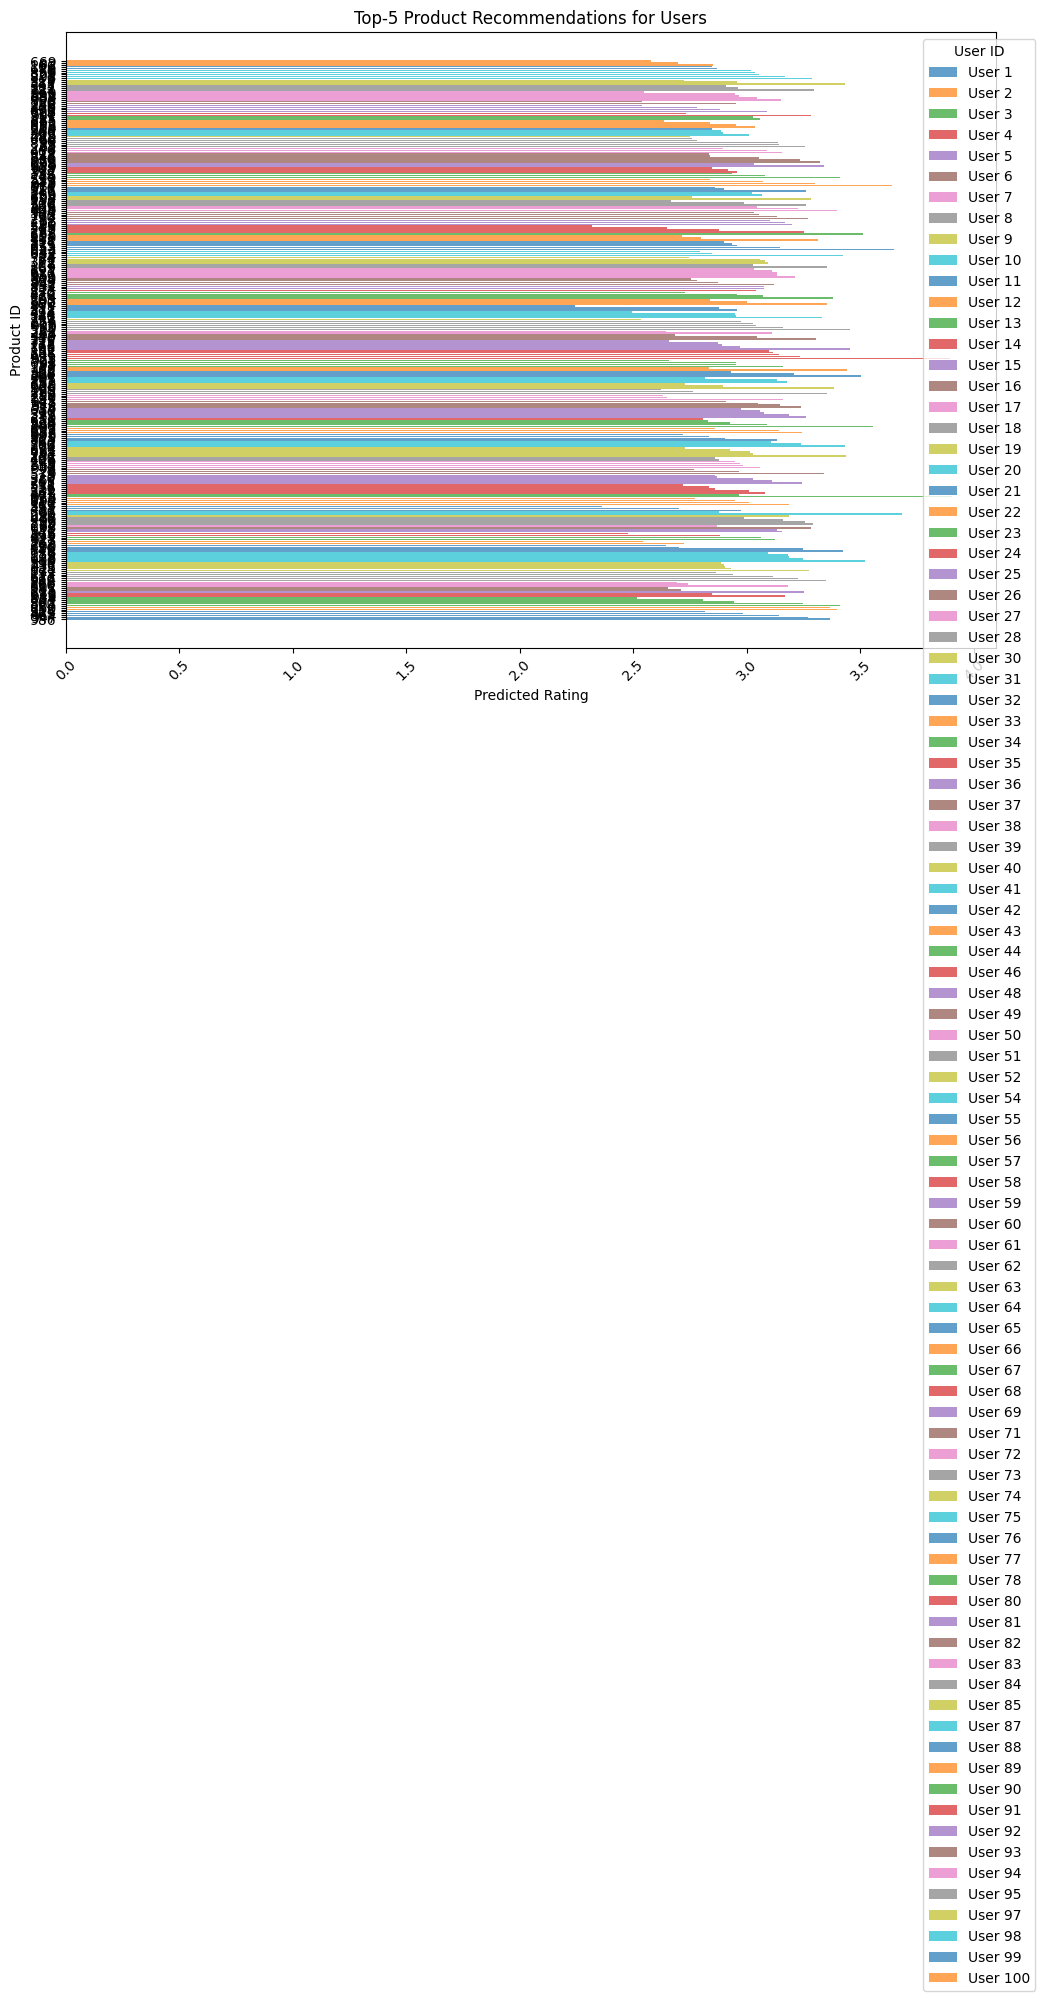

In [51]:
# Plot Top-N Recommendations for each user
plt.figure(figsize=(12, 8))  # Adjusted figure size for top N recommendations

# Iterate over each unique user
for user_id in top_n_recommendations['User ID'].unique():
    user_recommendations = top_n_recommendations[top_n_recommendations['User ID'] == user_id]
    
    # Plot the top N products for this user
    plt.barh(user_recommendations['Product ID'].astype(str), 
             user_recommendations['Predicted Rating'], 
             label=f'User {user_id}', alpha=0.7)

plt.xlabel('Predicted Rating')
plt.ylabel('Product ID')
plt.title(f'Top-{N} Product Recommendations for Users')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.legend(title='User ID', loc='upper right', bbox_to_anchor=(1.05, 1))
plt.tight_layout()  # Adjusts the layout to prevent overlap with the legend
plt.show()



# Method 4 - Singular Value Decomposition (SVD)

Here we are using SVD (Singular Value Decomposition) for collaborative filtering-based recommendation, that specifically shows how the User will rate a particular Product.

In [52]:
from sklearn.decomposition import TruncatedSVD

# Create a user-item matrix (User x Movie)
# Create user-item interaction matrix (userId x productId)
user_item_matrix = df.pivot(index='User ID', columns='Product ID', values= "Rating")

# Fill missing values with 0 (indicating no interaction)
user_item_matrix = user_item_matrix.fillna(0)

print(user_item_matrix.head())

Product ID  1     2     3     4     5     6     7     8     9     10    ...  \
User ID                                                                 ...   
1            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
3            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
5            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

Product ID  991   992   993   994   995   996   997   998   999   1000  
User ID                                                                 
1            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
5       

# Collaborative Filtering Using Matrix Factorization (SVD)

Using Collaborative Filtering that uses user-item interactions (e.g., user ratings for products) to predict how a user might rate an item.

In [53]:
# Apply SVD for collaborative filtering (matrix factorization)
svd = TruncatedSVD(n_components=20)  # Use 20 latent features
latent_matrix = svd.fit_transform(user_item_matrix)

# Reconstruct the matrix
reconstructed_matrix = svd.inverse_transform(latent_matrix)

# Example: Recommend products for a user
user_id = 1

user_ratings = reconstructed_matrix[user_id - 1]  # Indexing is 0-based, so we subtract 1

recommended_product_indices = user_ratings.argsort()[::-1]  # Sort products by predicted rating

# Display top 5 recommended products for user 1
recommended_products = df.iloc[recommended_product_indices[:5]]
print("Top 5 Recommended Products:")
print(recommended_products[['User ID', 'Product ID', 'Rating']])

Top 5 Recommended Products:
     User ID  Product ID    Rating
871       94         872  4.646393
982       94         983  4.457362
827       94         828  4.401708
959       94         960  4.139661
829       94         830  3.729792


# Content-based Filtering

In [54]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Prepare product features for content-based filtering
product_features = df_new[['Price'] + [col for col in df_new.columns if 'Product_Name' in col or 'Brand' in col]]

# Standardize continuous features (like price)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(product_features)

# Calculate the cosine similarity matrix
cosine_sim = cosine_similarity(scaled_features)

# Example: Recommend products similar to product 101 (Red T-Shirt)
def get_similar_products(product_id, top_n=5):
    idx = df_new[df_new['Product ID'] == product_id].index[0]
    similarity_scores = list(enumerate(cosine_sim[idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    # Get top N most similar products
    top_similar_products = [df_new['Product ID'][i[0]] for i in similarity_scores[1:top_n + 1]]
    return df_new[df_new['Product ID'].isin(top_similar_products)]

similar_products = get_similar_products(101)

print(similar_products[['Product ID', 'Price', 'Rating']])

     Product ID  Price    Rating
322         323     95  2.326168
548         549     96  4.283951
560         561     96  3.968456
566         567     96  1.206723
857         858     96  4.451841


In [55]:
# Collaborative recommendations for user (using SVD)
collaborative_recommendations = recommended_products[['Product ID', 'Price', 'Rating']]

# Content-based recommendations for a product (using cosine similarity)
content_based_recommendations = get_similar_products(1)

# Combine both recommendation lists
hybrid_recommendations = pd.concat([collaborative_recommendations, content_based_recommendations[['Product ID', 'Price', 'Rating']]])
print("Hybrid Recommendations (Collaborative + Content-Based):")
print(hybrid_recommendations.drop_duplicates())

Hybrid Recommendations (Collaborative + Content-Based):
     Product ID  Price    Rating
871         872     96  4.646393
982         983     50  4.457362
827         828     29  4.401708
959         960     50  4.139661
829         830     54  3.729792
42           43     39  3.601869
75           76     39  2.974139
562         563     39  4.043087
657         658     40  3.252305
695         696     39  4.592767


In [56]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE for collaborative filtering (SVD)
rmse = np.sqrt(mean_squared_error(user_item_matrix.values, reconstructed_matrix))

print(f"RMSE for Collaborative Filtering (SVD): {rmse}")

RMSE for Collaborative Filtering (SVD): 0.2668464058874244


The RMSE value of 0.2666 for SVD-based Collaborative Filtering model suggests that the model is performing well.

# Segmenting the users into spending group

Segmenting users into high-spending or low-spending group can be used in data analysis and marketing strategy. By doing this, we can personalize marketing efforts, improve customer experience, and optimize business strategies. Here's I segment users based on these a key dimension — spending as how many users purchase the most products.

High-Spending: Users whose total spending or average purchase amount is above a threshold, 70.

Low-Spending: Users whose total spending or average purchase amount is below a certain threshold, which is 70.

In [57]:
# craete a new dataframe

df_seg = pd.DataFrame(df)

In [58]:
# Ensure 'Price' is always treated as an iterable (even if it's a single integer)

def handle_purchase_prices(Price):
    # since it's not a list or iterable, we will first make it a list
    if isinstance(Price, int):
        return [Price]
    return Price

In [59]:
# Apply the function to ensure 'purchase_prices' is a list

df_seg['Price'] = df_seg['Price'].apply(handle_purchase_prices)

In [60]:
# Feature: Total Purchase Amount (Total amount spent by the user)
df_seg['total_purchase_amount'] = df_seg['Price'].apply(lambda x: sum(x))


In [61]:
# Set thresholds for segmentation
spending_threshold = 70  # High spending if total_purchase_amount > 70

In [62]:
# Create new segmentation columns
df_seg['spending_segment'] = np.where(df_seg['total_purchase_amount'] > spending_threshold, 'High Spending', 'Low Spending')

In [63]:
df_seg = df_seg.drop(columns = ["Price"])

In [64]:
df_seg.head()

,User ID,Product ID,Product Name,Brand,Category,Rating,Color,Size,total_purchase_amount,spending_segment
0,19,1,Dress,Adidas,Men's Fashion,1.043159,Black,XL,40,Low Spending
1,97,2,Shoes,H&M,Women's Fashion,4.026416,Black,L,82,High Spending
2,25,3,Dress,Adidas,Women's Fashion,3.337938,Yellow,XL,44,Low Spending
3,57,4,Shoes,Zara,Men's Fashion,1.049523,White,S,23,Low Spending
4,79,5,T-shirt,Adidas,Men's Fashion,4.302773,Black,M,79,High Spending


# CatBoost Model with spending_segment column

In [65]:
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define target and features
X = df_seg.drop(columns=['Rating'])
y = df_seg['Rating']

# Categorical features
categorical_features = ['User ID', 'Product Name', 'Brand', 'Category', 'Color', 'Size', 'spending_segment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create CatBoost model
model_seg = CatBoostRegressor(
    iterations=1000,        # Number of boosting rounds
    depth=10,               # Depth of trees
    learning_rate=0.1,      # Learning rate
    loss_function='RMSE',   # Loss function for regression
    cat_features=categorical_features,  # Specify which features are categorical
    verbose=200             # Output every 200 iterations
)

# Train the model
model_seg.fit(X_train, y_train)

# Make predictions
y_pred_seg = model_seg.predict(X_test)

# Evaluate performance (RMSE)
rmse = mean_squared_error(y_test, y_pred_seg)
print(f"Root Mean Squared Error (RMSE): {rmse}")


0:	learn: 1.1346041	total: 78.8ms	remaining: 1m 18s
200:	learn: 0.2539151	total: 12.3s	remaining: 49s
400:	learn: 0.0551810	total: 25.1s	remaining: 37.5s
600:	learn: 0.0164877	total: 37.6s	remaining: 25s
800:	learn: 0.0048373	total: 50s	remaining: 12.4s
999:	learn: 0.0016200	total: 1m 2s	remaining: 0us
Root Mean Squared Error (RMSE): 1.5434667675182085


In [66]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_seg)
print(f"R-squared: {r2}")

R-squared: -0.07171633364028551


In [67]:
y_pred_seg

array([2.77577787, 3.1082565 , 2.92779141, 2.50297215, 2.65577412,
       2.80567984, 3.26872438, 3.13667754, 3.3456565 , 3.26077689,
       3.24197328, 3.71751182, 3.03433233, 3.26340126, 3.35784897,
       2.74843029, 3.5067117 , 2.81259443, 2.61472403, 3.40737165,
       2.53005293, 2.96528899, 2.94938162, 3.33069437, 2.91615586,
       3.12120166, 3.32477552, 3.93581557, 2.87013953, 3.4082656 ,
       2.66082688, 3.12402196, 2.84423519, 2.59816182, 3.08598846,
       2.77533142, 3.00972588, 2.71499735, 2.76088226, 3.07630813,
       3.23080699, 2.96195481, 3.38035914, 3.79232317, 2.81524315,
       3.55749109, 3.48109363, 3.51135684, 3.01618361, 3.30718962,
       3.10557701, 3.54756618, 3.31546109, 2.96961387, 3.26744867,
       3.0248418 , 2.90688931, 2.91698498, 3.36889279, 2.62735682,
       2.99361786, 3.11563525, 2.96905037, 2.97871417, 3.16718413,
       3.06933382, 2.81205657, 2.91404729, 3.29624933, 2.60187223,
       3.04142787, 2.35734682, 3.02332417, 3.19150204, 3.02991

1400:	learn: 0.3613886	total: 1m 20s	remaining: 5.69s
1499:	learn: 0.3318614	total: 1m 27s	remaining: 0us
[CV] END bagging_temperature=1.0, depth=8, iterations=1500, l2_leaf_reg=1, learning_rate=0.01, od_wait=300; total time= 1.5min
0:	learn: 1.1303673	total: 58.8ms	remaining: 1m 28s
200:	learn: 0.5198573	total: 10.7s	remaining: 1m 9s
400:	learn: 0.2105265	total: 23.1s	remaining: 1m 3s
600:	learn: 0.0977414	total: 35.3s	remaining: 52.8s
800:	learn: 0.0473731	total: 48s	remaining: 41.9s
1000:	learn: 0.0238273	total: 1m	remaining: 30s
1200:	learn: 0.0124404	total: 1m 12s	remaining: 18s
1400:	learn: 0.0064925	total: 1m 25s	remaining: 6.01s
1499:	learn: 0.0047315	total: 1m 31s	remaining: 0us
[CV] END bagging_temperature=1.0, depth=8, iterations=1500, l2_leaf_reg=1, learning_rate=0.05, od_wait=300; total time= 1.6min
0:	learn: 1.1176200	total: 97.9ms	remaining: 2m 26s
200:	learn: 0.2170386	total: 11.7s	remaining: 1m 15s
400:	learn: 0.0454241	total: 23.7s	remaining: 1m 5s
600:	learn: 0.01328

[CV] END bagging_temperature=1.0, depth=10, iterations=1000, l2_leaf_reg=1, learning_rate=0.1, od_wait=300; total time= 2.5min
0:	learn: 1.1443085	total: 193ms	remaining: 3m 12s
200:	learn: 0.9809596	total: 19.8s	remaining: 1m 18s
400:	learn: 0.8537626	total: 39s	remaining: 58.3s
600:	learn: 0.7212180	total: 58.7s	remaining: 39s
800:	learn: 0.5859099	total: 1m 22s	remaining: 20.5s
999:	learn: 0.4882982	total: 1m 45s	remaining: 0us
[CV] END bagging_temperature=1.0, depth=10, iterations=1000, l2_leaf_reg=3, learning_rate=0.01, od_wait=300; total time= 1.8min
0:	learn: 1.1372572	total: 114ms	remaining: 1m 53s
200:	learn: 0.4649680	total: 19.3s	remaining: 1m 16s
400:	learn: 0.1627571	total: 41.2s	remaining: 1m 1s
600:	learn: 0.0644645	total: 1m 1s	remaining: 41s
800:	learn: 0.0260541	total: 1m 22s	remaining: 20.4s
999:	learn: 0.0113194	total: 1m 41s	remaining: 0us
[CV] END bagging_temperature=1.0, depth=10, iterations=1000, l2_leaf_reg=3, learning_rate=0.05, od_wait=300; total time= 1.7min

600:	learn: 0.0584912	total: 34.4s	remaining: 22.8s
800:	learn: 0.0244089	total: 46s	remaining: 11.4s
999:	learn: 0.0108539	total: 59.1s	remaining: 0us
[CV] END bagging_temperature=1.0, depth=8, iterations=1000, l2_leaf_reg=3, learning_rate=0.1, od_wait=300; total time= 1.0min
0:	learn: 1.1252098	total: 52.3ms	remaining: 52.2s
200:	learn: 1.0539151	total: 7.92s	remaining: 31.5s
400:	learn: 0.9796606	total: 15.9s	remaining: 23.7s
600:	learn: 0.9035637	total: 25s	remaining: 16.6s
800:	learn: 0.8240639	total: 36.4s	remaining: 9.05s
999:	learn: 0.7497012	total: 47.8s	remaining: 0us
[CV] END bagging_temperature=1.0, depth=8, iterations=1000, l2_leaf_reg=5, learning_rate=0.01, od_wait=300; total time=  49.8s
0:	learn: 1.1223931	total: 80.7ms	remaining: 1m 20s
200:	learn: 0.7552980	total: 10.3s	remaining: 40.8s
400:	learn: 0.4980497	total: 21.9s	remaining: 32.7s
600:	learn: 0.3498732	total: 32.9s	remaining: 21.9s
800:	learn: 0.2468632	total: 44.8s	remaining: 11.1s
999:	learn: 0.1731567	total:

999:	learn: 0.1315775	total: 59.7s	remaining: 0us
[CV] END bagging_temperature=1.0, depth=8, iterations=1000, l2_leaf_reg=5, learning_rate=0.05, od_wait=300; total time= 1.0min
0:	learn: 1.1303620	total: 54.3ms	remaining: 54.3s
200:	learn: 0.5162990	total: 10.9s	remaining: 43.3s
400:	learn: 0.2320740	total: 23s	remaining: 34.4s
600:	learn: 0.1054128	total: 35.4s	remaining: 23.5s
800:	learn: 0.0529373	total: 47.9s	remaining: 11.9s
999:	learn: 0.0273877	total: 1m	remaining: 0us
[CV] END bagging_temperature=1.0, depth=8, iterations=1000, l2_leaf_reg=5, learning_rate=0.1, od_wait=300; total time= 1.1min
0:	learn: 1.1249558	total: 63.5ms	remaining: 1m 35s
200:	learn: 0.9922269	total: 8.92s	remaining: 57.6s
400:	learn: 0.8638373	total: 18.4s	remaining: 50.4s
600:	learn: 0.7382718	total: 29.1s	remaining: 43.5s
800:	learn: 0.6085533	total: 41.5s	remaining: 36.2s
1000:	learn: 0.5012285	total: 54.2s	remaining: 27s
1200:	learn: 0.4166556	total: 1m 6s	remaining: 16.6s
1400:	learn: 0.3503704	total:

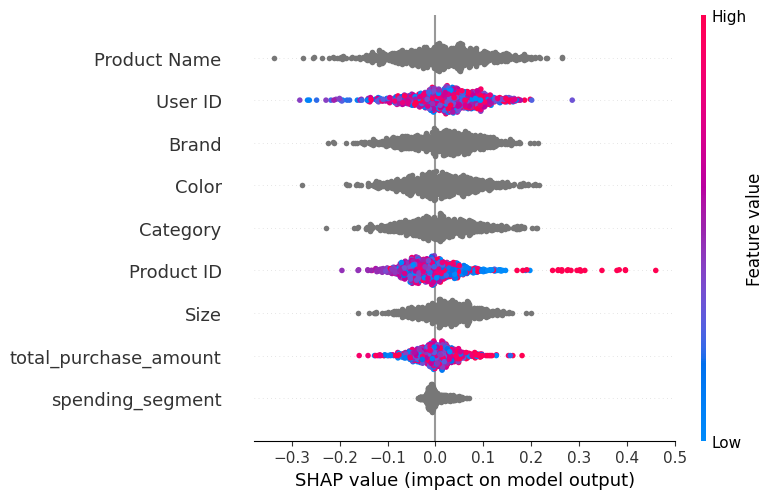

In [68]:
# Assuming you used CatBoost for training
import shap

# Fit the model (example using CatBoost)
# model.fit(X_train, y_train)

# SHAP (SHapley Additive exPlanations) for feature importance
explainer = shap.TreeExplainer(model_seg)
shap_values = explainer.shap_values(X_train)

# Summary plot for feature importance
shap.summary_plot(shap_values, X_train)

# Segment-wise Analysis

# Compute Average Rating per Spending Segment

Calculating the average rating for each spending segment (e.g., Low Spending, High Spending) to see if there's a noticeable difference between them.

In [69]:
# Assuming 'data' is your dataframe containing 'spending_segment' and 'ratings'

# Group by spending segment and calculate the mean of ratings
average_ratings_by_segment = df_seg.groupby('spending_segment')['Rating'].mean()

print("Average Ratings by Spending Segment:")
print(average_ratings_by_segment)

Average Ratings by Spending Segment:
spending_segment
High Spending    3.035180
Low Spending     2.970891
Name: Rating, dtype: float64


There is somewhat difference between high spenders rating vs low spender rating. High spenders tends to rate products slightly more positively than low spenders.

# Visualize the Distribution of Ratings for Each Segment

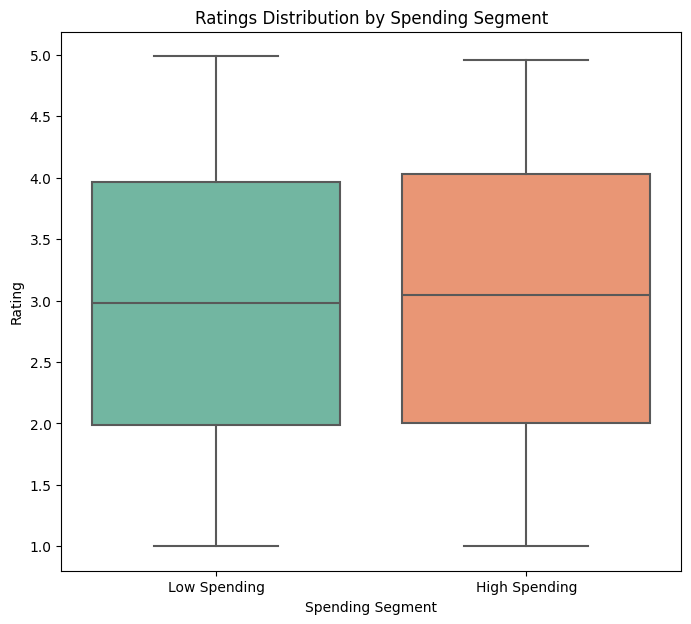

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to compare ratings between spending segments
plt.figure(figsize=(8, 7))
sns.boxplot(x='spending_segment', y='Rating', data=df_seg, palette="Set2")
plt.title('Ratings Distribution by Spending Segment')
plt.xlabel('Spending Segment')
plt.ylabel('Rating')
plt.show()

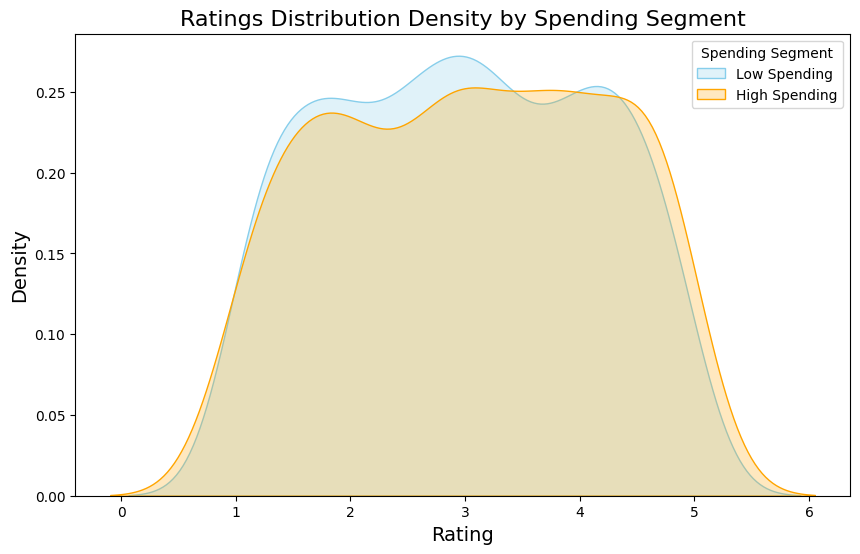

In [71]:
# Create KDE plot to show the density of ratings for each spending segment
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df_seg[df_seg['spending_segment'] == 'Low Spending']['Rating'], label='Low Spending', shade=True, color='skyblue')
sns.kdeplot(data=df_seg[df_seg['spending_segment'] == 'High Spending']['Rating'], label='High Spending', shade=True, color='orange')

# Add more segments if applicable
# sns.kdeplot(data[data['Spending Segment'] == 'Medium Spending']['rating'], label='Medium Spending', shade=True, color='green')

# Title and labels
plt.title('Ratings Distribution Density by Spending Segment', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Show the legend and plot
plt.legend(title='Spending Segment')
plt.show()


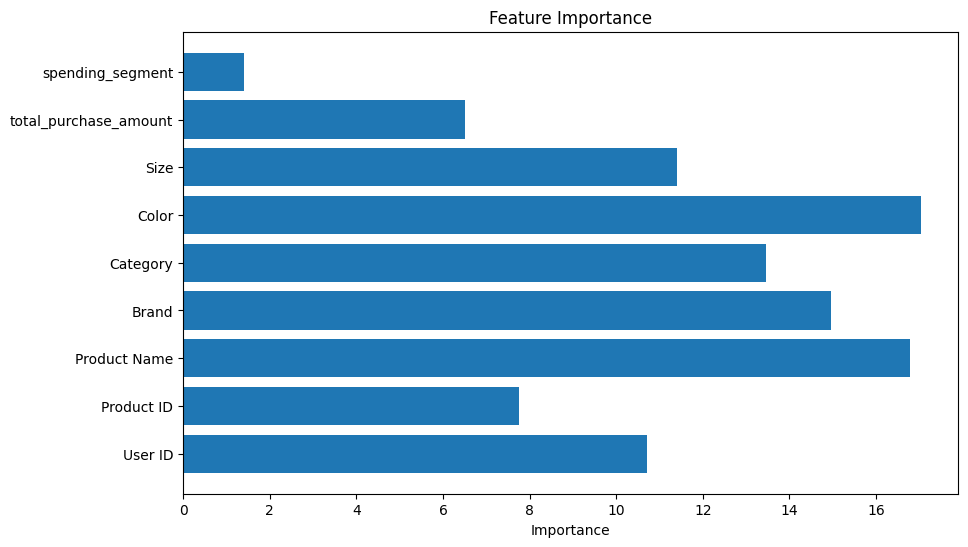

In [72]:
import matplotlib.pyplot as plt

feature_importances = model_seg.get_feature_importance()
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(feature_names, feature_importances)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.show()

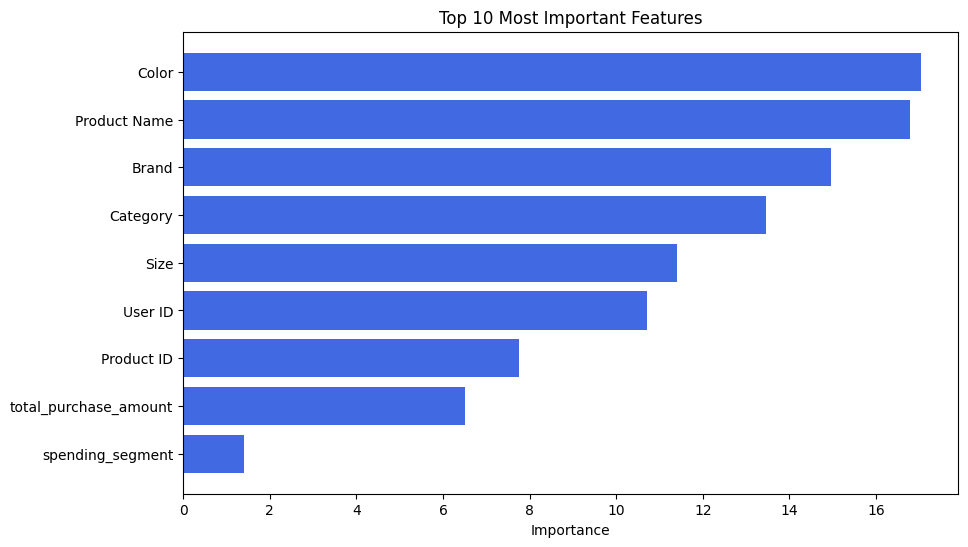

In [73]:
# Get feature importance
feature_importances = model_seg.get_feature_importance()

# Get feature names (make sure they match the original features used in the model)
feature_names = X.columns

# Create a DataFrame to view feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot top 10 features
top_10_features = feature_importance_df.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='royalblue')
plt.xlabel('Importance')
plt.title('Top 10 Most Important Features')
plt.gca().invert_yaxis()  # To show the highest importance on top
plt.show()

Summary: 

CatBoost, a gradient boosting framework works well with our training set beacuse of the presence of high number of categorical features and is also effective in predicting a continuous outcome (rating). 